# Packages required


In [1]:
%pip install --upgrade pyod


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:


import pandas as pd



# Import the dataset and preprocessing

numpy
matplot lib 
seaborn

In [13]:
# Specify the file path
file_path = 'data/mnist.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p142,p143,p144,p145,p146,p147,p148,p149,p150,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,197,0,0,1
1,0,0,0,0,245,0,0,0,0,0,...,0,0,0,0,0,0,253,0,0,0
2,0,0,0,0,234,0,45,0,0,10,...,0,0,0,0,0,0,253,253,202,0
3,0,0,0,0,0,0,17,0,0,143,...,0,0,0,0,0,0,0,0,201,0
4,0,0,0,0,254,0,15,0,0,98,...,0,0,0,0,0,0,0,0,93,0


In [14]:
all_zero_columns = df.columns[df.eq(0).all()]
print(all_zero_columns.size)

43


In [15]:
# Drop the columns with all zeros
df = df.drop(all_zero_columns, axis=1)

# Save the cleaned dataset to a new file
cleaned_file_path = 'data/mnist_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


# cleaned dataset upload

In [3]:
# Specify the file path
cleaned_file_path = 'data/mnist_cleaned.csv'

# Read the cleaned dataset into a pandas DataFrame
df_cleaned = pd.read_csv(cleaned_file_path)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

# check for columns with the same value
same_value_columns = df_cleaned.columns[df_cleaned.nunique() == 1]
print(same_value_columns.size)

# split in to features and labels
df_cleaned_features = df_cleaned.iloc[:, :-1]
df_cleaned_labels = df_cleaned.iloc[:, -1]

0


In [15]:
df_cleaned.head()

,p01,p03,p05,p07,p09,p10,p12,p14,p15,p16,...,p136,p137,p138,p141,p144,p146,p148,p149,p150,class
0,0,0,0,0,0,0,0,139,0,0,...,254,0,0,160,0,0,197,0,0,1
1,0,0,245,0,0,0,207,54,0,0,...,240,0,0,248,0,0,253,0,0,0
2,0,0,234,45,0,10,253,176,0,0,...,253,254,0,94,0,0,253,253,202,0
3,0,0,0,17,0,143,0,210,0,0,...,172,0,0,0,0,0,0,0,201,0
4,0,0,254,15,0,98,19,28,0,0,...,0,0,0,0,0,0,0,0,93,0


In [14]:
print(df_cleaned_features.head())
print(df_cleaned_labels.head())
print(df_cleaned_features.shape)
print(df_cleaned_labels.shape)

   p01  p03  p05  p07  p09  p10  p12  p14  p15  p16  ...  p135  p136  p137  \
0    0    0    0    0    0    0    0  139    0    0  ...     0   254     0   
1    0    0  245    0    0    0  207   54    0    0  ...     0   240     0   
2    0    0  234   45    0   10  253  176    0    0  ...     0   253   254   
3    0    0    0   17    0  143    0  210    0    0  ...    44   172     0   
4    0    0  254   15    0   98   19   28    0    0  ...     0     0     0   

   p138  p141  p144  p146  p148  p149  p150  
0     0   160     0     0   197     0     0  
1     0   248     0     0   253     0     0  
2     0    94     0     0   253   253   202  
3     0     0     0     0     0     0   201  
4     0     0     0     0     0     0    93  

[5 rows x 107 columns]
0    1
1    0
2    0
3    0
4    0
Name: class, dtype: int64
(5500, 107)
(5500,)


In [6]:
print(type(df_cleaned_features))

<class 'pandas.core.frame.DataFrame'>


# Algorithms


## ABOD


In [7]:
data_abod = df_cleaned_features
labels_abod = df_cleaned_labels

# Import the ABOD class
from pyod.models.abod import ABOD
from sklearn.metrics import classification_report
import numpy as np

# Initialize the FastABOD model
model_fast_abod = ABOD(contamination=1/11, method='fast', n_neighbors=20)

# Convert to numpy array with float64 dtype
data_abod_np = np.array(data_abod, dtype=np.float64)

# Fit the model to the data
model_fast_abod.fit(data_abod_np)

# Compare the results with the true labels
report_abod = classification_report(labels_abod, model_fast_abod.labels_, zero_division=0)
print(report_abod)



              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.22      0.22      0.22       500

    accuracy                           0.86      5500
   macro avg       0.57      0.57      0.57      5500
weighted avg       0.86      0.86      0.86      5500



In [11]:
label_diff_abod = labels_abod - model_fast_abod.labels_
label_sum_abod = labels_abod + model_fast_abod.labels_

In [14]:
print("True positives is referred to inliers that are correctly classified as inliers")
print("True positives: ",(label_sum_abod==0).sum())
print("True negatives: ",(label_sum_abod==2).sum())
print("False positives: ",(label_diff_abod==-1).sum())
print("False negatives:",(label_diff_abod==1).sum())

True positives is referred to inliers that are correctly classified as inliers
True positives:  4608
True negatives:  108
False positives:  392
False negatives: 392


## Isolation forest (IF)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_iforest.py:308: UserWarning: max_samples (5000) is greater than the total number of samples (4400). max_samples will be set to n_samples for estimation.
  warn(


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1000
           1       0.17      0.20      0.18       100

    accuracy                           0.84      1100
   macro avg       0.54      0.55      0.54      1100
weighted avg       0.85      0.84      0.84      1100

ROC-AUC Score: 0.55


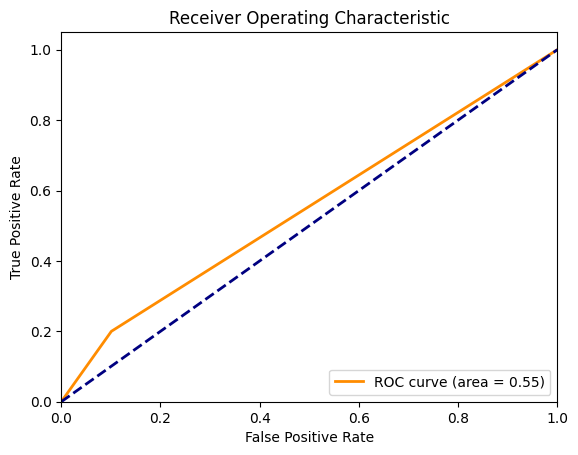

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

data_if = df_cleaned_features
labels_if = df_cleaned_labels

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(data_if, labels_if, test_size=0.2, stratify=labels_if, random_state=42)

# Feature scaling
scaler_if = StandardScaler()
X_train_scaled = scaler_if.fit_transform(X_train)
X_test_scaled = scaler_if.transform(X_test)

# Initialize model
model = IsolationForest(n_estimators=400, max_samples=5000, max_features=107, contamination=1/11)

# Fit model on training data and predict anomalies on test data
model.fit(X_train_scaled)
anomalies = model.predict(X_test_scaled)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
anomalies = [0 if x == 1 else 1 for x in anomalies]

# Print classification report
print(classification_report(y_test, anomalies, zero_division=0)) 

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, anomalies)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, anomalies)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Second implementation.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [16]:
data_if = df_cleaned_features
labels_if = df_cleaned_labels

# Feature scaling
scaler_if = StandardScaler()
scaled_data_if = scaler_if.fit_transform(data_if)

In [17]:
# Initialize model
model = IsolationForest(n_estimators=200, max_samples= 5000, max_features=107,contamination=1/11)

# Fit model and predict anomalies
anomalies = model.fit_predict(scaled_data_if)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
anomalies = [0 if x == 1 else 1 for x in anomalies]

# Assuming you have true labels for evaluation
print(classification_report(df_cleaned_labels, anomalies,zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.19      0.19      0.19       500

    accuracy                           0.85      5500
   macro avg       0.55      0.55      0.55      5500
weighted avg       0.85      0.85      0.85      5500



In [18]:
label_diff_if = df_cleaned_labels - anomalies
label_sum_if = df_cleaned_labels + anomalies

print("True positives: ",(label_sum_if==0).sum())
print("True negatives: ",(label_sum_if==2).sum())
print("False positives: ",(label_diff_if==-1).sum())
print("False negatives:",(label_diff_if==1).sum())

True positives:  4595
True negatives:  95
False positives:  405
False negatives: 405


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50],
    'max_samples': [128, 256],
    'max_features': [5, 10],
    'contamination': [0.1]
}

# Initialize the model
model = IsolationForest()
# Specify a scoring metric for GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_data_if)

# Get the best hyperparameter settings
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

In [35]:
# Fit the best model
best_model.fit(scaled_data_if)

# Predict anomalies
best_anomalies = best_model.predict(scaled_data_if)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
best_anomalies = [0 if x == 1 else 1 for x in best_anomalies]

In [37]:
print(classification_report(df_cleaned_labels, best_anomalies,zero_division=0))

print(anomalies.count(1))

print(df_cleaned_labels.sum())

print(best_anomalies[:10])

print(df_cleaned_labels[:10])

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5000
           1       0.06      0.06      0.06       500

    accuracy                           0.82      5500
   macro avg       0.48      0.48      0.48      5500
weighted avg       0.83      0.82      0.82      5500

5000
500
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: class, dtype: int64


## deep iForest

In [14]:
from sklearn.preprocessing import StandardScaler
from pyod.models.dif import DIF


In [15]:
data_dif = df_cleaned_features
labels_dif = df_cleaned_labels

# Feature scaling
scaler_dif = StandardScaler()
scaled_data_dif = scaler_dif.fit_transform(data_dif)

In [16]:
# Create an instance of the DIF model
model_dif = DIF(contamination=1/11)

# Fit the model to your data
model_dif.fit(scaled_data_dif)

# Predict the binary labels (0: inliers, 1: outliers)
scores_dif = model_dif.labels_

# Compare the results with the true labels
report_dif = classification_report(labels_dif, scores_dif, zero_division=0)

NameError: name 'classification_report' is not defined

In [17]:
labels_diff_dif = labels_dif - scores_dif
labels_sum_dif = labels_dif + scores_dif

print("True positives: ",(labels_sum_dif==0).sum())
print("True negatives: ",(labels_sum_dif==2).sum())
print("False positives: ",(labels_diff_dif==-1).sum())
print("False negatives:",(labels_diff_dif==1).sum())

True positives:  4611
True negatives:  111
False positives:  389
False negatives: 389


## PCA

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate the features and labels
X = df_cleaned_features
y = df_cleaned_labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X_scaled)

# Calculate the anomaly score
distances = np.linalg.norm(X_scaled - pca.inverse_transform(X_pca), axis=1)
scores_pca = distances - np.mean(distances)
scores_pca = np.abs(scores_pca)

# Set a threshold for anomaly detection
threshold = np.percentile(scores_pca, 93)

# Identify outliers
outliers = np.where(scores_pca > threshold)[0]

In [48]:
# Create an array of zeros
labels_pca = np.zeros(len(y))

# Set the outlier position to 1
labels_pca[outliers] = 1

print(labels_pca[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
# Print the outliers
print("Number of outliers:", len(outliers))

labels_diff_pca = y - labels_pca
labels_sum_pca = y + labels_pca

print("True positives: ",(labels_sum_pca==0).sum())
print("True negatives: ",(labels_sum_pca==2).sum())
print("False positives: ",(labels_diff_pca==-1).sum())
print("False negatives:",(labels_diff_pca==1).sum())

Number of outliers: 385
True positives:  4767
True negatives:  152
False positives:  233
False negatives: 348


## kNN 


On Training Data:
KNN ROC:0.6935, precision @ rank n:0.2325

On Test Data:
KNN ROC:0.68, precision @ rank n:0.21
PR AUC:  0.18698816797549908


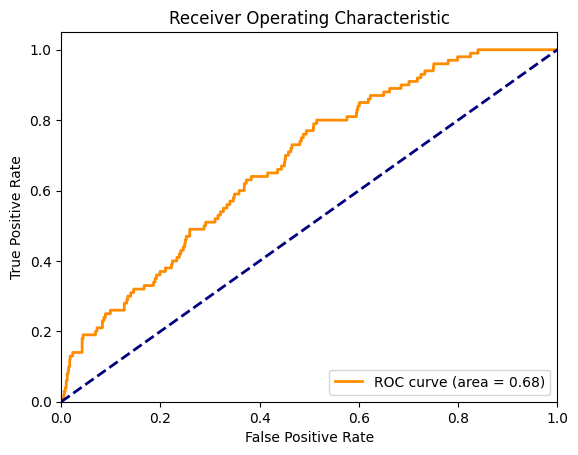

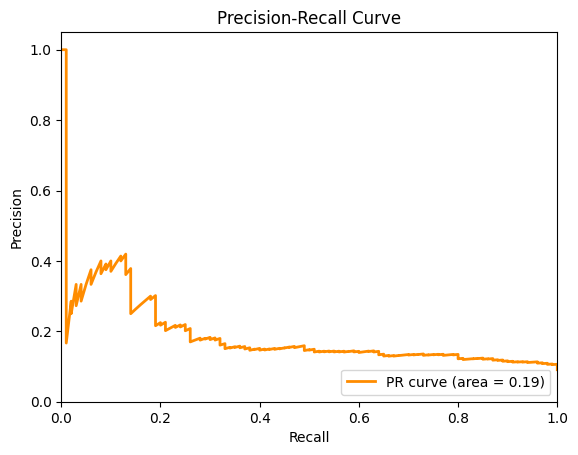

In [12]:
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc


CONTAMINATION = 1/11  # percentage of outliers

# Generate sample data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_cleaned_features, df_cleaned_labels, test_size=0.2, stratify=df_cleaned_labels, random_state=42)

# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=CONTAMINATION, n_neighbors=15)
clf.fit(X_train_knn)

# get the prediction labels and outlier scores of the training data
y_train_knn_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_knn_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_knn_pred = clf.predict(X_test_knn)  # outlier labels (0 or 1)
y_test_knn_scores = clf.decision_function(X_test_knn)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train_knn, y_train_knn_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test_knn, y_test_knn_scores)
precision, recall, _ = precision_recall_curve(y_test_knn, y_test_knn_scores)
pr_auc = auc(recall, precision)
print("PR AUC: ", pr_auc)


# Plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_knn, y_test_knn_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## experiments with balanced data 
in this section i am trying to train model on a dataset composed by 50% of inliers and 50% of outliers
seems to have better results on certain metric (i.e. AUC-PR, that make sense to use because of the large amount of inliers in the dataset df_cleaned)

class
1    500
0    500
Name: count, dtype: int64

On Training Data:
KNN ROC:0.2462, precision @ rank n:0.325

On Test Data:
KNN ROC:0.3313, precision @ rank n:0.38
PR AUC:  0.44138098901554607


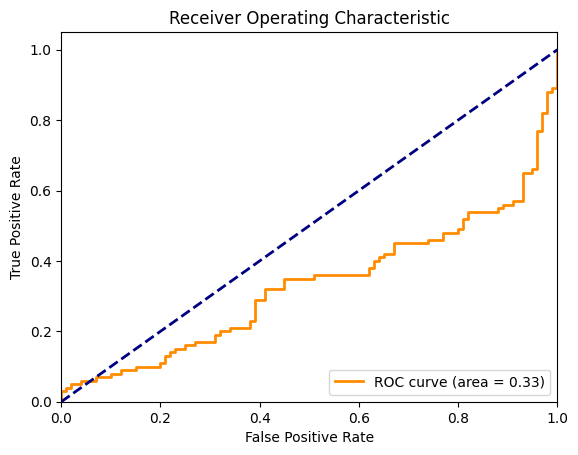

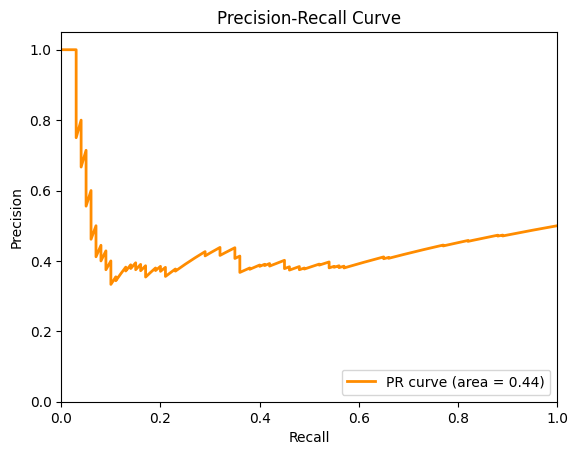

In [10]:
## Equalize the number of inliers and outliers

import pandas as pd

# Select 500 inliers
inliers = df_cleaned[df_cleaned['class'] == 0]
inliers_sampled = inliers.sample(n=500, random_state=42)

# Select 500 outliers
outliers = df_cleaned[df_cleaned['class'] == 1]
outliers_sampled = outliers.sample(n=500, random_state=42)

# Concatenate the inliers and outliers
df_eq = pd.concat([inliers_sampled, outliers_sampled])

# Shuffle the dataset
df_eq = df_eq.sample(frac=1, random_state=42)

# Split the dataset into features and labels
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Display the first few rows of the dataset
df_eq.head()
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc

print(df_eq['class'].value_counts())


## Try kNN 

CONTAMINATION = 1/2  # percentage of outliers

# Generate sample data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=CONTAMINATION, n_neighbors=100)
clf.fit(X_train_knn)

# get the prediction labels and outlier scores of the training data
y_train_knn_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_knn_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_knn_pred = clf.predict(X_test_knn)  # outlier labels (0 or 1)
y_test_knn_scores = clf.decision_function(X_test_knn)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train_knn, y_train_knn_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test_knn, y_test_knn_scores)
precision, recall, _ = precision_recall_curve(y_test_knn, y_test_knn_scores)
pr_auc = auc(recall, precision)
print("PR AUC: ", pr_auc)


# Plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_knn, y_test_knn_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

The results above are not that good. It may be because of the kNN detector that isnt suitable to high dimensional data.

Now we try with isolation forest and see how it work.

class
1    500
0    500
Name: count, dtype: int64

On Training Data:
KNN ROC:0.2462, precision @ rank n:0.325

On Test Data:
KNN ROC:0.3313, precision @ rank n:0.38
PR AUC:  0.44138098901554607


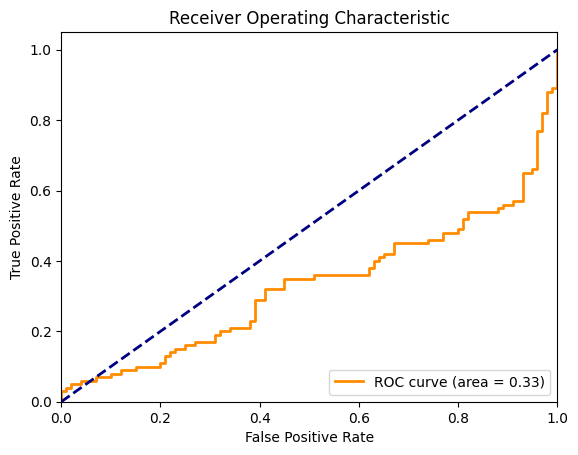

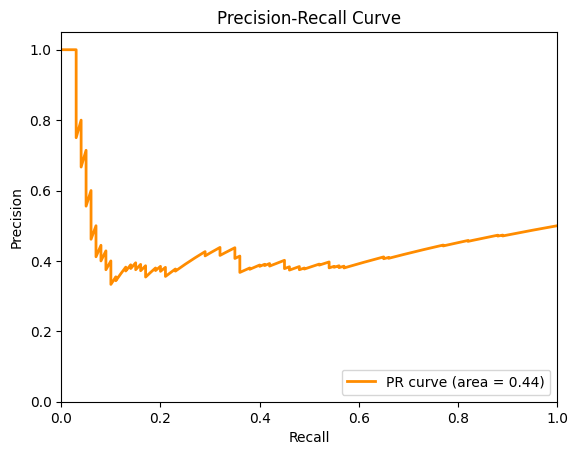

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(



On Training Data:
iForest ROC:0.2523, precision @ rank n:0.3125

On Test Data:
iForest ROC:0.3285, precision @ rank n:0.38
PR AUC:  0.42845094156157376


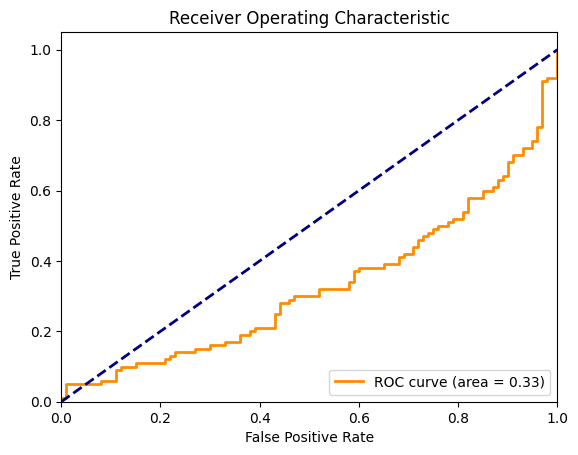

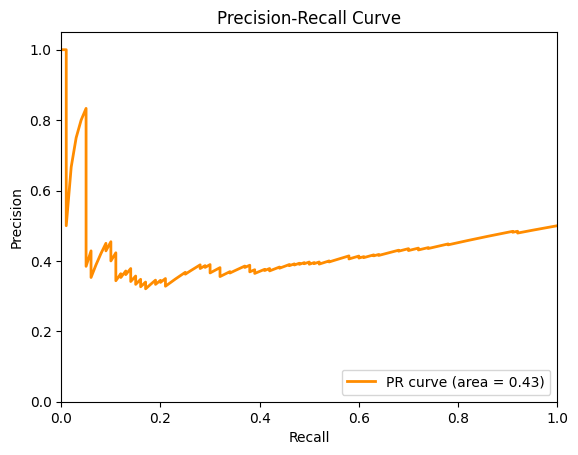

In [13]:
## Equalize the number of inliers and outliers

import pandas as pd

# Select 500 inliers
inliers = df_cleaned[df_cleaned['class'] == 0]
inliers_sampled = inliers.sample(n=500, random_state=42)

# Select 500 outliers
outliers = df_cleaned[df_cleaned['class'] == 1]
outliers_sampled = outliers.sample(n=500, random_state=42)

# Concatenate the inliers and outliers
df_eq = pd.concat([inliers_sampled, outliers_sampled])

# Shuffle the dataset
df_eq = df_eq.sample(frac=1, random_state=42)

# Split the dataset into features and labels
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Display the first few rows of the dataset
df_eq.head()

from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc

print(df_eq['class'].value_counts())

## Try kNN 

CONTAMINATION = 1/2  # percentage of outliers

# Generate sample data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=CONTAMINATION, n_neighbors=100)
clf.fit(X_train_knn)

# get the prediction labels and outlier scores of the training data
y_train_knn_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_knn_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_knn_pred = clf.predict(X_test_knn)  # outlier labels (0 or 1)
y_test_knn_scores = clf.decision_function(X_test_knn)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train_knn, y_train_knn_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test_knn, y_test_knn_scores)
precision, recall, _ = precision_recall_curve(y_test_knn, y_test_knn_scores)
pr_auc = auc(recall, precision)
print("PR AUC: ", pr_auc)

# Plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_knn, y_test_knn_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


## iForest Implementation and Evaluation

from pyod.models.iforest import IForest

# Generate sample data
X_train_if, X_test_if, y_train_if, y_test_if = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Isolation Forest detector
clf_name_if = 'iForest'
clf_if = IForest(contamination=CONTAMINATION, random_state=42, max_samples=500, n_estimators=200, max_features=107)
clf_if.fit(X_train_if)

# Get the prediction labels and outlier scores of the training data
y_train_if_pred = clf_if.labels_  # binary labels (0: inliers, 1: outliers)
y_train_if_scores = clf_if.decision_scores_  # raw outlier scores

# Get the prediction on the test data
y_test_if_pred = clf_if.predict(X_test_if)  # outlier labels (0 or 1)
y_test_if_scores = clf_if.decision_function(X_test_if)  # outlier scores

# Evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name_if, y_train_if, y_train_if_scores)
# here miss the auc score on training data
print("\nOn Test Data:")
evaluate_print(clf_name_if, y_test_if, y_test_if_scores)
precision_if, recall_if, _ = precision_recall_curve(y_test_if, y_test_if_scores)
pr_auc_if = auc(recall_if, precision_if)
print("PR AUC: ", pr_auc_if)

# Plot ROC curve for iForest
fpr_if, tpr_if, thresholds_if = roc_curve(y_test_if, y_test_if_scores)
roc_auc_if = auc(fpr_if, tpr_if)

plt.figure()
plt.plot(fpr_if, tpr_if, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_if)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for iForest
plt.figure()
plt.plot(recall_if, precision_if, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc_if)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa


On Training Data (kNN):
KNN ROC:0.3445, precision @ rank n:0.365

On Test Data (kNN):
KNN ROC:0.3989, precision @ rank n:0.42
PR AUC (kNN):  0.4579981260819164


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa


On Training Data (iForest):
iForest ROC:0.2809, precision @ rank n:0.345

On Test Data (iForest):
iForest ROC:0.3688, precision @ rank n:0.39
PR AUC (iForest):  0.4346103259833414


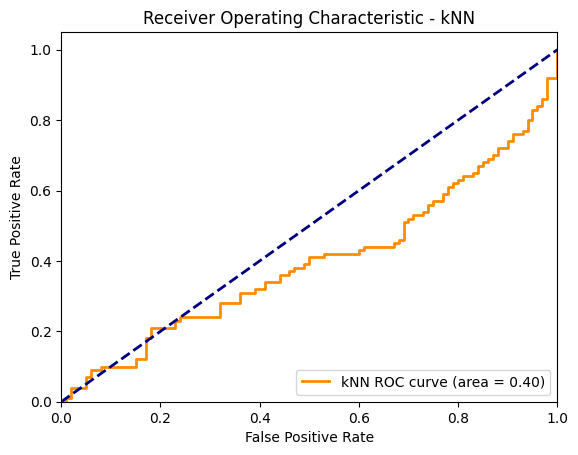

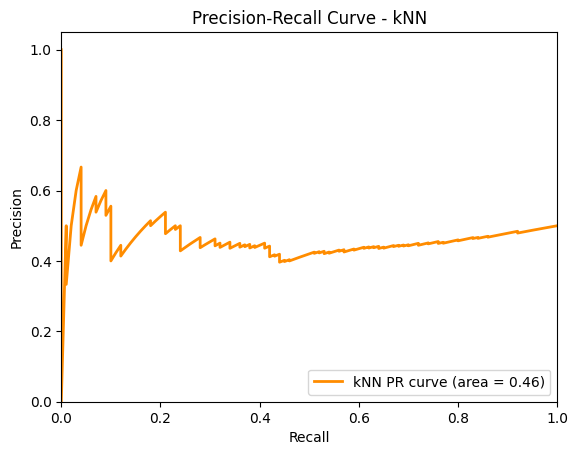

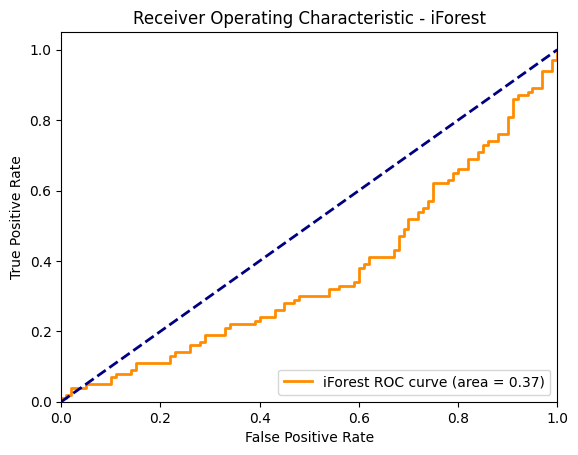

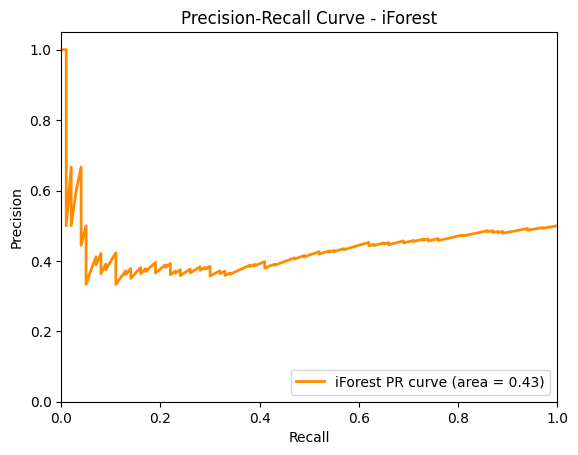

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Hyperparameter tuning for kNN
knn_params = {
    'n_neighbors': [5, 10, 20, 50, 100],
    'contamination': [0.1, 0.2, 0.3, 0.4, 0.5]
}
knn = KNN()
knn_gs = GridSearchCV(knn, knn_params, scoring='f1', cv=5)
knn_gs.fit(X_train)
best_knn = knn_gs.best_estimator_

# Train and evaluate kNN
y_train_pred_knn = best_knn.labels_
y_train_scores_knn = best_knn.decision_scores_
y_test_pred_knn = best_knn.predict(X_test)
y_test_scores_knn = best_knn.decision_function(X_test)

print("\nOn Training Data (kNN):")
evaluate_print('KNN', y_train, y_train_scores_knn)
print("\nOn Test Data (kNN):")
evaluate_print('KNN', y_test, y_test_scores_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_scores_knn)
pr_auc_knn = auc(recall_knn, precision_knn)
print("PR AUC (kNN): ", pr_auc_knn)

# Hyperparameter tuning for Isolation Forest
iforest_params = {
    'n_estimators': [50, 100, 200],
    'contamination': [0.1, 0.2, 0.3, 0.4, 0.5]
    
}
iforest = IForest()
iforest_gs = GridSearchCV(iforest, iforest_params, scoring='f1', cv=5)
iforest_gs.fit(X_train)
best_iforest = iforest_gs.best_estimator_

# Train and evaluate Isolation Forest
y_train_pred_if = best_iforest.labels_
y_train_scores_if = best_iforest.decision_scores_
y_test_pred_if = best_iforest.predict(X_test)
y_test_scores_if = best_iforest.decision_function(X_test)

print("\nOn Training Data (iForest):")
evaluate_print('iForest', y_train, y_train_scores_if)
print("\nOn Test Data (iForest):")
evaluate_print('iForest', y_test, y_test_scores_if)
precision_if, recall_if, _ = precision_recall_curve(y_test, y_test_scores_if)
pr_auc_if = auc(recall_if, precision_if)
print("PR AUC (iForest): ", pr_auc_if)

# Plot ROC curve for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='kNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - kNN')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for kNN
plt.figure()
plt.plot(recall_knn, precision_knn, color='darkorange', lw=2, label='kNN PR curve (area = %0.2f)' % pr_auc_knn)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - kNN')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for iForest
fpr_if, tpr_if, _ = roc_curve(y_test, y_test_scores_if)
roc_auc_if = auc(fpr_if, tpr_if)

plt.figure()
plt.plot(fpr_if, tpr_if, color='darkorange', lw=2, label='iForest ROC curve (area = %0.2f)' % roc_auc_if)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - iForest')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for iForest
plt.figure()
plt.plot(recall_if, precision_if, color='darkorange', lw=2, label='iForest PR curve (area = %0.2f)' % pr_auc_if)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - iForest')
plt.legend(loc="lower right")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

Cross-Validation F1 Scores (kNN): [0.16666667 0.10869565 0.1        0.17977528 0.16326531]
Mean CV F1 Score (kNN): 0.143680581172381

On Training Data (kNN):
KNN ROC:0.3445, precision @ rank n:0.365

On Test Data (kNN):
KNN ROC:0.3989, precision @ rank n:0.42
PR AUC (kNN):  0.4579981260819164


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

Cross-Validation F1 Scores (iForest): [0.12121212 0.06185567 0.09345794 0.04347826 0.08421053]
Mean CV F1 Score (iForest): 0.08084290448516046

On Training Data (iForest):
iForest ROC:0.2928, precision @ rank n:0.35

On Test Data (iForest):
iForest ROC:0.3914, precision @ rank n:0.43
PR AUC (iForest):  0.45647332772298443


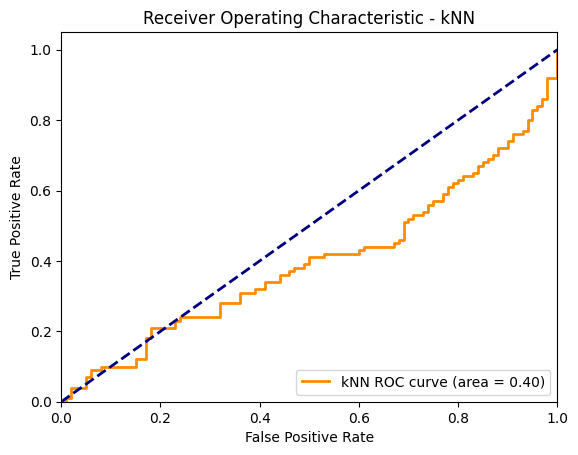

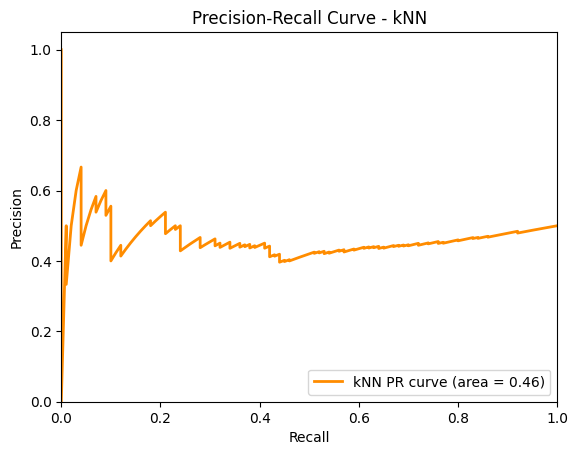

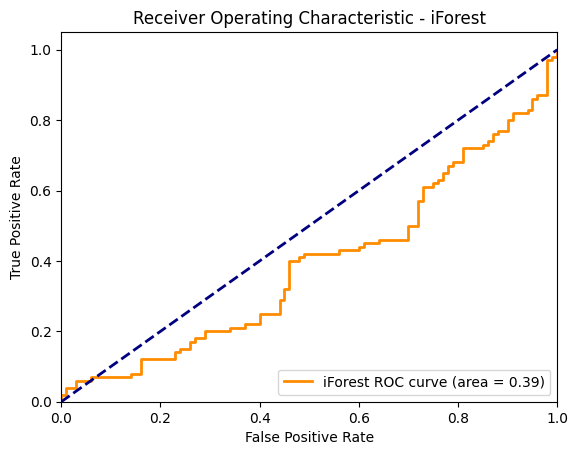

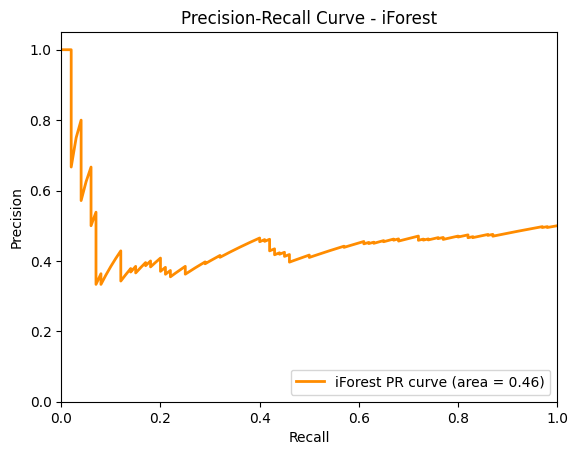

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Hyperparameter tuning for kNN
knn_params = {
    'n_neighbors': [5, 10, 20, 50, 100],
    'contamination': [0.1, 0.2, 0.3, 0.4, 0.5]
}
knn = KNN()
knn_gs = GridSearchCV(knn, knn_params, scoring='f1', cv=5)
knn_gs.fit(X_train)
best_knn = knn_gs.best_estimator_

# Cross-validation scores for kNN
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores (kNN):", cv_scores_knn)
print("Mean CV F1 Score (kNN):", cv_scores_knn.mean())

# Train and evaluate kNN
y_train_pred_knn = best_knn.labels_
y_train_scores_knn = best_knn.decision_scores_
y_test_pred_knn = best_knn.predict(X_test)
y_test_scores_knn = best_knn.decision_function(X_test)

print("\nOn Training Data (kNN):")
evaluate_print('KNN', y_train, y_train_scores_knn)
print("\nOn Test Data (kNN):")
evaluate_print('KNN', y_test, y_test_scores_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_scores_knn)
pr_auc_knn = auc(recall_knn, precision_knn)
print("PR AUC (kNN): ", pr_auc_knn)

# Hyperparameter tuning for Isolation Forest
iforest_params = {
    'n_estimators': [50, 100, 200],
    'contamination': [0.1, 0.2, 0.3, 0.4, 0.5]
}
iforest = IForest()
iforest_gs = GridSearchCV(iforest, iforest_params, scoring='f1', cv=5)
iforest_gs.fit(X_train)
best_iforest = iforest_gs.best_estimator_

# Cross-validation scores for Isolation Forest
cv_scores_iforest = cross_val_score(best_iforest, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores (iForest):", cv_scores_iforest)
print("Mean CV F1 Score (iForest):", cv_scores_iforest.mean())

# Train and evaluate Isolation Forest
y_train_pred_if = best_iforest.labels_
y_train_scores_if = best_iforest.decision_scores_
y_test_pred_if = best_iforest.predict(X_test)
y_test_scores_if = best_iforest.decision_function(X_test)

print("\nOn Training Data (iForest):")
evaluate_print('iForest', y_train, y_train_scores_if)
print("\nOn Test Data (iForest):")
evaluate_print('iForest', y_test, y_test_scores_if)
precision_if, recall_if, _ = precision_recall_curve(y_test, y_test_scores_if)
pr_auc_if = auc(recall_if, precision_if)
print("PR AUC (iForest): ", pr_auc_if)

# Plot ROC curve for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='kNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - kNN')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for kNN
plt.figure()
plt.plot(recall_knn, precision_knn, color='darkorange', lw=2, label='kNN PR curve (area = %0.2f)' % pr_auc_knn)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - kNN')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for iForest
fpr_if, tpr_if, _ = roc_curve(y_test, y_test_scores_if)
roc_auc_if = auc(fpr_if, tpr_if)

plt.figure()
plt.plot(fpr_if, tpr_if, color='darkorange', lw=2, label='iForest ROC curve (area = %0.2f)' % roc_auc_if)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - iForest')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for iForest
plt.figure()
plt.plot(recall_if, precision_if, color='darkorange', lw=2, label='iForest PR curve (area = %0.2f)' % pr_auc_if)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - iForest')
plt.legend(loc="lower right")
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Hyperparameter tuning for kNN
knn_params = {
    'n_neighbors': [5, 10, 20, 50, 100],
    'contamination': [0.1, 0.2, 0.3, 0.4, 0.5]
}
knn = KNN()
knn_gs = GridSearchCV(knn, knn_params, scoring='f1', cv=5)
knn_gs.fit(X_train)
best_knn = knn_gs.best_estimator_

# Cross-validation scores for kNN
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores (kNN):", cv_scores_knn)
print("Mean CV F1 Score (kNN):", cv_scores_knn.mean())

# Train and evaluate kNN
y_train_pred_knn = best_knn.labels_
y_train_scores_knn = best_knn.decision_scores_
y_test_pred_knn = best_knn.predict(X_test)
y_test_scores_knn = best_knn.decision_function(X_test)

print("\nOn Training Data (kNN):")
evaluate_print('KNN', y_train, y_train_scores_knn)
print("\nOn Test Data (kNN):")
evaluate_print('KNN', y_test, y_test_scores_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_scores_knn)
pr_auc_knn = auc(recall_knn, precision_knn)
print("PR AUC (kNN): ", pr_auc_knn)

# Hyperparameter tuning for Isolation Forest
iforest_params = {
    'n_estimators': [50, 100, 200],
    'contamination': [0.1, 0.2, 0.3, 0.4, 0.5]
}
iforest = IForest()
iforest_gs = GridSearchCV(iforest, iforest_params, scoring='f1', cv=5)
iforest_gs.fit(X_train)
best_iforest = iforest_gs.best_estimator_

# Cross-validation scores for Isolation Forest
cv_scores_iforest = cross_val_score(best_iforest, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores (iForest):", cv_scores_iforest)
print("Mean CV F1 Score (iForest):", cv_scores_iforest.mean())

# Train and evaluate Isolation Forest
y_train_pred_if = best_iforest.labels_
y_train_scores_if = best_iforest.decision_scores_
y_test_pred_if = best_iforest.predict(X_test)
y_test_scores_if = best_iforest.decision_function(X_test)

print("\nOn Training Data (iForest):")
evaluate_print('iForest', y_train, y_train_scores_if)
print("\nOn Test Data (iForest):")
evaluate_print('iForest', y_test, y_test_scores_if)
precision_if, recall_if, _ = precision_recall_curve(y_test, y_test_scores_if)
pr_auc_if = auc(recall_if, precision_if)
print("PR AUC (iForest): ", pr_auc_if)

# Implementation of FastABOD
fastabod_params = {
    'n_neighbors': [5, 10, 20, 50, 100],
    'method': ['fast']
}
fastabod = ABOD()
fastabod_gs = GridSearchCV(fastabod, fastabod_params, scoring='f1', cv=5)
fastabod_gs.fit(X_train)
best_fastabod = fastabod_gs.best_estimator_

# Cross-validation scores for FastABOD
cv_scores_fastabod = cross_val_score(best_fastabod, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores (FastABOD):", cv_scores_fastabod)
print("Mean CV F1 Score (FastABOD):", cv_scores_fastabod.mean())

# Train and evaluate FastABOD
y_train_pred_fabod = best_fastabod.labels_
y_train_scores_fabod = best_fastabod.decision_scores_
y_test_pred_fabod = best_fastabod.predict(X_test)
y_test_scores_fabod = best_fastabod.decision_function(X_test)

print("\nOn Training Data (FastABOD):")
evaluate_print('FastABOD', y_train, y_train_scores_fabod)
print("\nOn Test Data (FastABOD):")
evaluate_print('FastABOD', y_test, y_test_scores_fabod)
precision_fabod, recall_fabod, _ = precision_recall_curve(y_test, y_test_scores_fabod)
pr_auc_fabod = auc(recall_fabod, precision_fabod)
print("PR AUC (FastABOD): ", pr_auc_fabod)

# Plot ROC curve for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='kNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - kNN')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for kNN
plt.figure()
plt.plot(recall_knn, precision_knn, color='darkorange', lw=2, label='kNN PR curve (area = %0.2f)' % pr_auc_knn)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - kNN')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for iForest
fpr_if, tpr_if, _ = roc_curve(y_test, y_test_scores_if)
roc_auc_if = auc(fpr_if, tpr_if)

plt.figure()
plt.plot(fpr_if, tpr_if, color='darkorange', lw=2, label='iForest ROC curve (area = %0.2f)' % roc_auc_if)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - iForest')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for iForest
plt.figure()
plt.plot(recall_if, precision_if, color='darkorange', lw=2, label='iForest PR curve (area = %0.2f)' % pr_auc_if)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - iForest')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for FastABOD
fpr_fabod, tpr_fabod, _ = roc_curve(y_test, y_test_scores_fabod)
roc_auc_fabod = auc(fpr_fabod, tpr_fabod)

plt.figure()
plt.plot(fpr_fabod, tpr_fabod, color='darkorange', lw=2, label='FastABOD ROC curve (area = %0.2f)' % roc_auc_fabod)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - FastABOD')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve for FastABOD
plt.figure()
plt.plot(recall_fabod, precision_fabod, color='darkorange', lw=2, label='FastABOD PR curve (area = %0.2f)' % pr_auc_fabod)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - FastABOD')
plt.legend(loc="lower right")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

KeyboardInterrupt: 

## SUOD framework
currently not working as it cant find the module pyod.models.suod

In [23]:

from pyod.models.lof import LOF
from pyod.models.suod import SUOD
from pyod.models.iforest import IForest
from pyod.models.copod import COPOD
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

contamination = 0.5  # percentage of outliers

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# train SUOD
clf_name = 'SUOD'

# initialized a group of outlier detectors for acceleration
detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
                    LOF(n_neighbors=25), LOF(n_neighbors=35),
                    COPOD(), IForest(n_estimators=100),
                    IForest(n_estimators=200)]

# decide the number of parallel process, and the combination method
clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
            verbose=False)

# or to use the default detectors
# clf = SUOD(n_jobs=2, combination='average',
#            verbose=False)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

please install suod first for SUOD by `pip install suod`


ModuleNotFoundError: No module named 'suod'